In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
filename = '/content/drive/MyDrive/group3sweep3.txt'

In [ ]:
data = pd.read_csv(filename, sep='\s+', usecols=[1,2], names=['ch1', 'ch2'], header=None) # for reading dma files
print(data)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2030566570.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(filename, sep='\s+', usecols=[1,2], names=['ch1', 'ch2'], header=None) # for reading dma files


             ch1       ch2
0       0.048828  0.037720
1       0.046509  0.035767
2       0.044067  0.033691
3       0.041992  0.031738
4       0.039917  0.029663
...          ...       ...
499995  0.029785  0.110107
499996  0.030762  0.112061
499997  0.031494  0.114136
499998  0.032104  0.116211
499999  0.051392  0.039551

[500000 rows x 2 columns]


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


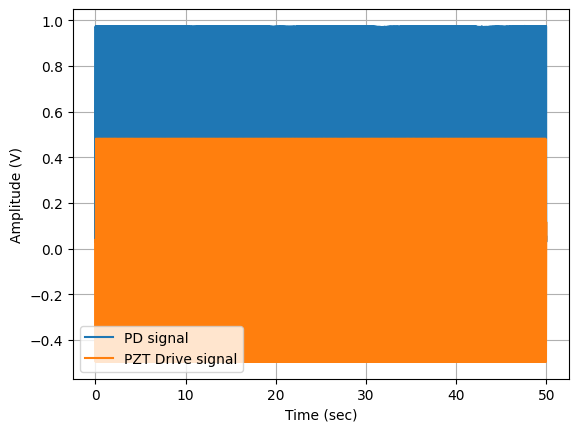

In [ ]:
sample_rate = 10000
tt = np.arange(len(data['ch1'].values))/sample_rate
plt.plot(tt, data['ch1'].values, label='PD signal')
plt.plot(tt, data['ch2'].values, label='PZT Drive signal')
plt.ylabel('Amplitude (V)')
plt.xlabel('Time (sec)')
plt.legend()
plt.grid()

(0.3, 0.6)

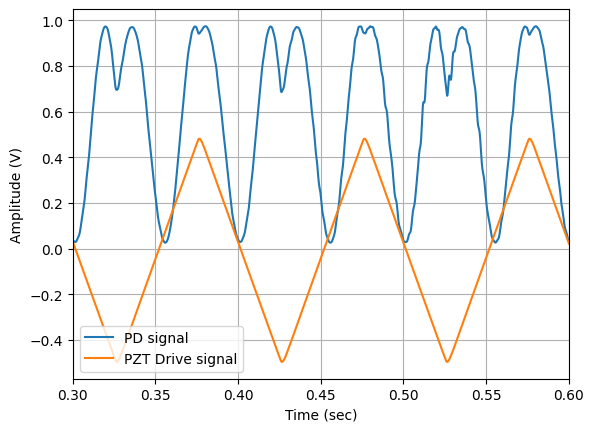

In [ ]:
plt.plot(tt, data['ch1'].values, label='PD signal')
plt.plot(tt, data['ch2'].values, label='PZT Drive signal')
plt.ylabel('Amplitude (V)')
plt.xlabel('Time (sec)')
plt.legend()
plt.grid()
plt.xlim([0.3, 0.6])

(0.033, 0.06)

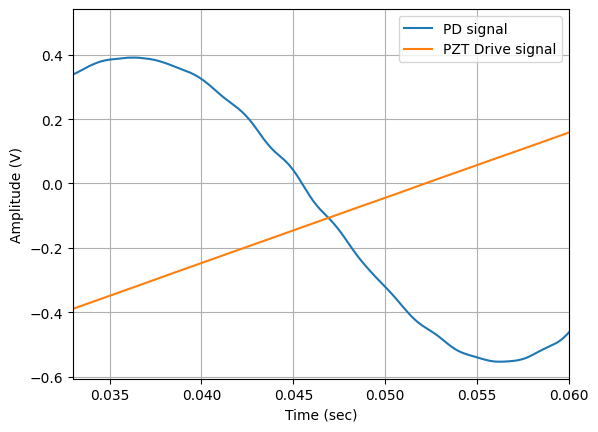

In [ ]:
plt.plot(tt, data['ch1'].values - np.mean(data['ch1'].values) , label='PD signal')
plt.plot(tt, data['ch2'].values - np.mean(data['ch2'].values), label='PZT Drive signal')
plt.ylabel('Amplitude (V)')
plt.xlabel('Time (sec)')
plt.legend()
plt.grid()
plt.xlim(0.033, 0.06)

Identify max and min indices

In [ ]:
t_ind1 = np.argmin(abs(tt-0.13))
t_ind2 = np.argmin(abs(tt-0.16))
ind_min = np.argmin(data['ch1'].values[t_ind1:t_ind2])+t_ind1
ind_max = np.argmax(data['ch1'].values[t_ind1:t_ind2])+t_ind1

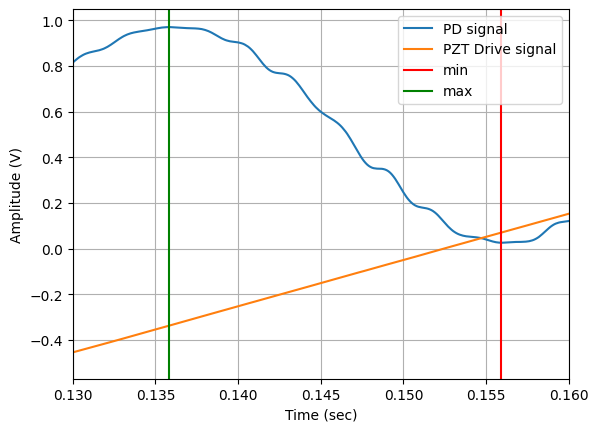

In [ ]:
plt.plot(tt, data['ch1'].values, label='PD signal')
plt.plot(tt, data['ch2'].values, label='PZT Drive signal')
plt.axvline(tt[ind_min], color='r', label='min')
plt.axvline(tt[ind_max], color='g', label='max')
plt.ylabel('Amplitude (V)')
plt.xlabel('Time (sec)')
plt.xlim([tt[t_ind1], tt[t_ind2]])
plt.legend()
plt.grid()

Fringe Contrast (or) Visibility

In [ ]:
min_value = data['ch1'].values[ind_min]
max_value = data['ch1'].values[ind_max]
contrast = (max_value - min_value)/(max_value + min_value)
operating_point = min_value + (max_value - min_value)/2

print(f"The min_value is {min_value:.4f}")
print(f"The max_value is {max_value:.4f}")
print(f"The fringe contrast is {contrast:.2f} = {contrast*100:.1f}%")
print(f"The operating point is {operating_point:.2f} Volts")

The min_value is 0.0255
The max_value is 0.9702
The fringe contrast is 0.95 = 94.9%
The operating point is 0.50 Volts


In [ ]:
laser_wavelength = 632.8e-9 # He-Ne wavelength
sensitivity = (2*np.pi/laser_wavelength)*(max_value - min_value) # assuming operating at mid-point
print(f"The sensitivity of the IFO is {sensitivity:.2g} V/m")

The sensitivity of the IFO is 9.4e+06 V/m


In [ ]:
V_drive1 = data['ch2'].values[ind_min]
print(V_drive1)
V_drive2 = data['ch2'].values[ind_max]
print(V_drive2)
deltaV = abs(V_drive2 - V_drive1)
drive_calibration = laser_wavelength / (4 * deltaV)
print(f"The calibration of the drive is {drive_calibration:.2g} m/V")

0.069702
-0.338501
The calibration of the drive is 3.9e-07 m/V


In [ ]:
deltaV = abs(V_drive2 - V_drive1)
drive_calibration = laser_wavelength / (4 * deltaV*15)
print(f"The calibration of the drive is {drive_calibration:.2g} m/V")

The calibration of the drive is 2.6e-08 m/V
